In [19]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Read the CSV file into a DataFrame
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Ass_02/USStates.xlsx')

# Display the first few rows of the DataFrame
print(df.head())

        State Region  Population  HouseholdIncome  HighSchool  College  \
0     Alabama      S       4.849           43.253        84.9     24.9   
1      Alaska      W       0.737           70.760        92.8     24.7   
2     Arizona      W       6.731           49.774        85.6     25.5   
3    Arkansas      S       2.966           40.768        87.1     22.4   
4  California      W      38.803           61.094        84.1     31.4   

   Smokers  PhysicalActivity  Obese  NonWhite  HeavyDrinkers  TwoParents  \
0     21.5              45.4   32.4      30.7            4.3        58.7   
1     22.6              55.3   28.4      33.1            8.2        69.6   
2     16.3              51.9   26.8      20.8            6.3        62.7   
3     25.9              41.2   34.6      21.7            5.0        62.0   
4     12.5              56.3   24.1      37.7            6.4        65.3   

   Insured  
0     78.8  
1     79.8  
2     74.7  
3     71.7  
4     79.7  


## Q 2. What is the population of interest for this problem (yes – this is a trick question!)?  Be sure your answer is clear and complete.

In [8]:
column_names = df.columns.tolist()
print(column_names)

['State', 'Region', 'Population', 'HouseholdIncome', 'HighSchool', 'College', 'Smokers', 'PhysicalActivity', 'Obese', 'NonWhite', 'HeavyDrinkers', 'TwoParents', 'Insured']


Brief explanation of each variable in the US States dataset:

State: The name of the U.S. state.

Region: The region of the U.S. where the state is located (e.g., Northeast,Midwest, South, West).

Population: The population of the state.

HouseholdIncome: The median household income in the state, which is a measure of the income earned by households in the state.

HighSchool: The percentage of the population in the state that has completed high school education.

College: The percentage of the population in the state that has completed college education.

Smokers: The percentage of smokers in the state.

PhysicalActivity: The percentage of the population in the state that engages in regular physical activity.

Obese: The percentage of the population in the state that is considered obese.

NonWhite: The percentage of the population in the state that is non-white.

HeavyDrinkers: The percentage of heavy drinkers in the state.

TwoParents: The percentage of households in the state with two parents.

Insured: The percentage of the population in the state that has health insurance coverage.



## Q 3. For the duration of this assignment, let’s have HOUSEHOLDINCOME be the response variable (Y).  Also, consider the STATE, REGION and POPULATION variables to be demographic variables.  Obtain basic summary statistics (i.e. n, mean, std dev.) for each variable.  Report these in a table.  Then, obtain all possible scatterplots relating the non-demographic explanatory variables (Xs) to the response variable (Y).   

In [9]:
df.describe()

,Population,HouseholdIncome,HighSchool,College,Smokers,PhysicalActivity,Obese,NonWhite,HeavyDrinkers,TwoParents,Insured
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000
mean,6.36394,53.284280,89.320000,30.830000,19.316000,50.734000,28.766000,22.156000,6.046000,65.52400,80.148000
std,7.15096,8.690234,3.107135,6.078643,3.523122,5.509643,3.369286,12.685572,1.175292,5.17074,5.494087
min,0.58400,39.031000,83.800000,21.100000,10.300000,37.400000,21.300000,4.800000,3.300000,52.30000,67.300000
25%,1.85800,46.814250,87.100000,25.900000,16.650000,47.650000,26.400000,13.350000,5.200000,62.70000,76.150000
50%,4.53150,51.757500,89.700000,30.150000,19.050000,50.650000,29.400000,20.750000,6.150000,65.45000,79.900000
75%,6.98275,58.724000,91.625000,35.250000,21.475000,54.125000,31.075000,30.225000,6.775000,69.50000,84.475000
max,38.80300,73.538000,95.400000,48.300000,27.300000,64.100000,35.100000,75.000000,8.600000,80.60000,92.800000


In [10]:
# Define demographic and non-demographic variables
demographic_vars = ['State', 'Region', 'Population']
response_var = 'HouseholdIncome'
non_demographic_vars = ['HighSchool', 'College', 'Smokers', 'PhysicalActivity',
                        'Obese', 'NonWhite', 'HeavyDrinkers', 'TwoParents', 'Insured']


### scatterplots relating the non-demographic explanatory variables (Xs) to the response variable (Y).

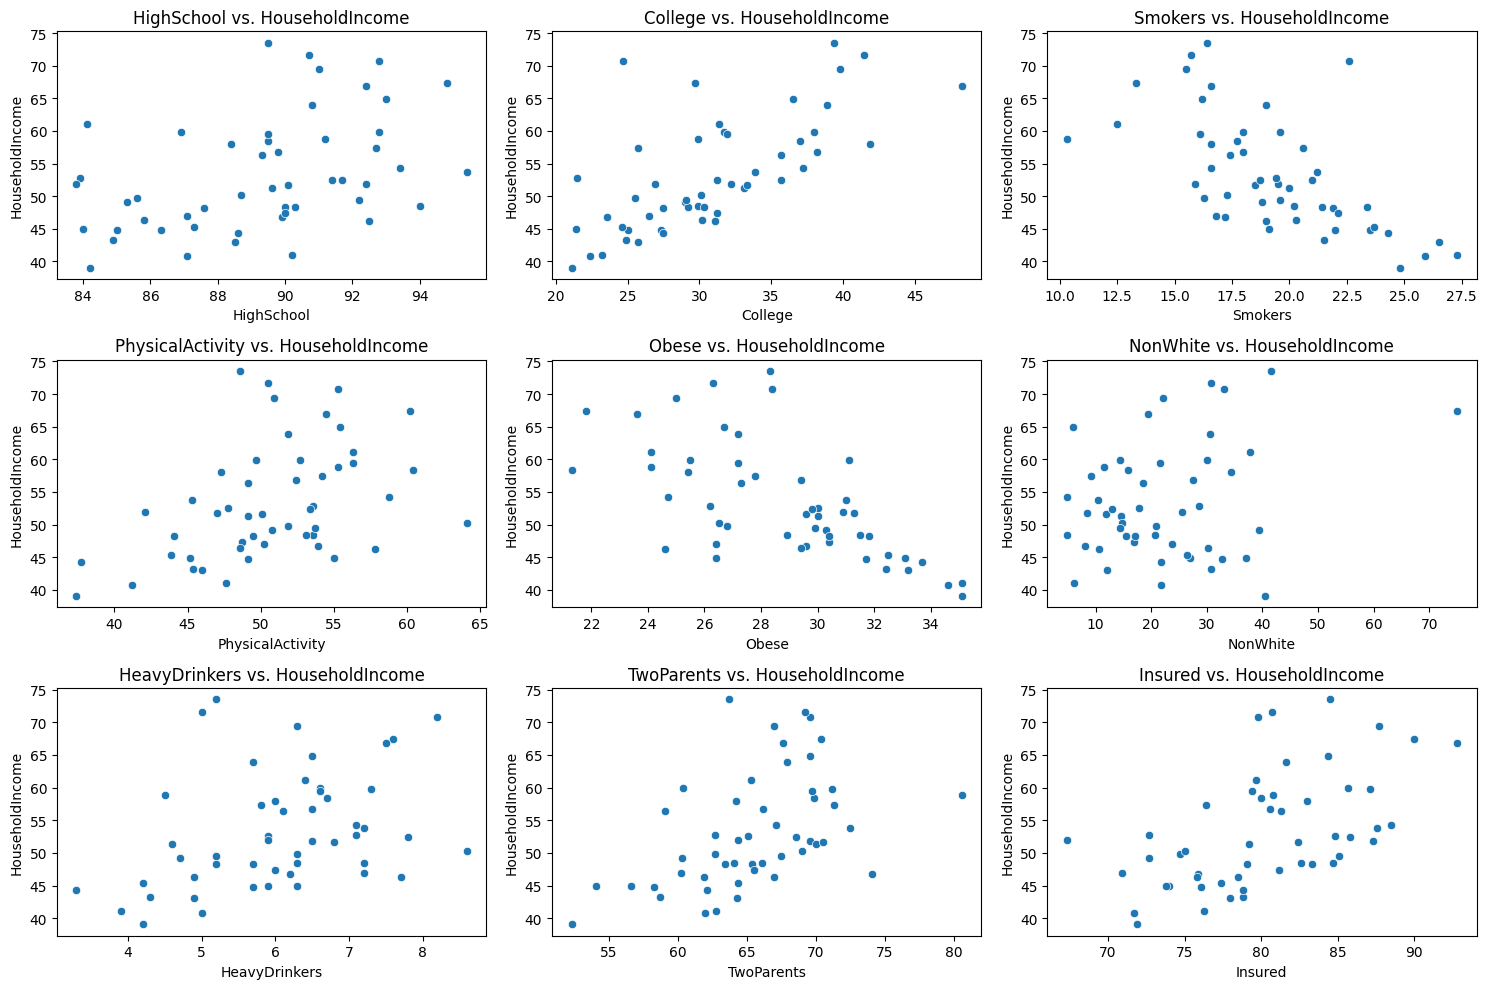

In [11]:
# Scatter plots for non-demographic variables against response variable
plt.figure(figsize=(15, 10))
for i, var in enumerate(non_demographic_vars, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=var, y=response_var, data=df)
    plt.title(f'{var} vs. {response_var}')
plt.tight_layout()
plt.show()

## Q 4. Obtain all possible pairwise Pearson Product Moment correlations of the non-demographic variables with the response variable Y and report the correlations in a table.  Given the scatterplots from step 3) and these correlation coefficients, is simple linear regression an appropriate analytical method for this data?   Why or why not?  


In [12]:
# Calculate pairwise Pearson correlations
correlation_matrix = df[non_demographic_vars + [response_var]].corr()


# Display correlation matrix
print("Pairwise Pearson Product Moment Correlations:")
print(correlation_matrix)


Pairwise Pearson Product Moment Correlations:
                  HighSchool   College   Smokers  PhysicalActivity     Obese  \
HighSchool          1.000000  0.480685 -0.150125          0.382559 -0.301334   
College             0.480685  1.000000 -0.485522          0.267362 -0.519045   
Smokers            -0.150125 -0.485522  1.000000         -0.590243  0.814867   
PhysicalActivity    0.382559  0.267362 -0.590243          1.000000 -0.780685   
Obese              -0.301334 -0.519045  0.814867         -0.780685  1.000000   
NonWhite           -0.361482 -0.057218 -0.155120         -0.079207 -0.106161   
HeavyDrinkers       0.386470  0.264925 -0.390434          0.664022 -0.555064   
TwoParents          0.697022  0.365850 -0.475431          0.495817 -0.459993   
Insured             0.751874  0.697235 -0.272492          0.297089 -0.351116   
HouseholdIncome     0.430845  0.685591 -0.637522          0.440417 -0.649112   

                  NonWhite  HeavyDrinkers  TwoParents   Insured  \
HighSc

REASON:-   

As for whether simple linear regression is an appropriate analytical method for this data, it depends on several factors:

Strength of correlations: Look at the correlation coefficients. If they are close to 1 or -1, it suggests a strong linear relationship, which would make simple linear regression more appropriate.

Linearity: Check if the scatterplots show a linear relationship between each non-demographic variable and the response variable. If the relationship appears to be linear, simple linear regression might be appropriate.

Assumptions: Consider whether the assumptions of linear regression hold for the data. These include linearity, independence, homoscedasticity, and normality of residuals.

Other considerations: Think about the context of the data and the research question. Sometimes, even if the correlation is not very strong or the relationship not perfectly linear, simple linear regression can still provide valuable insights.

Based on the correlation coefficients and the scatterplots, you can make a judgment about whether simple linear regression is suitable for this data. If the correlations are moderate to strong and the relationships appear to be linear, simple linear regression may be appropriate. Otherwise, you might need to explore other analytical methods.

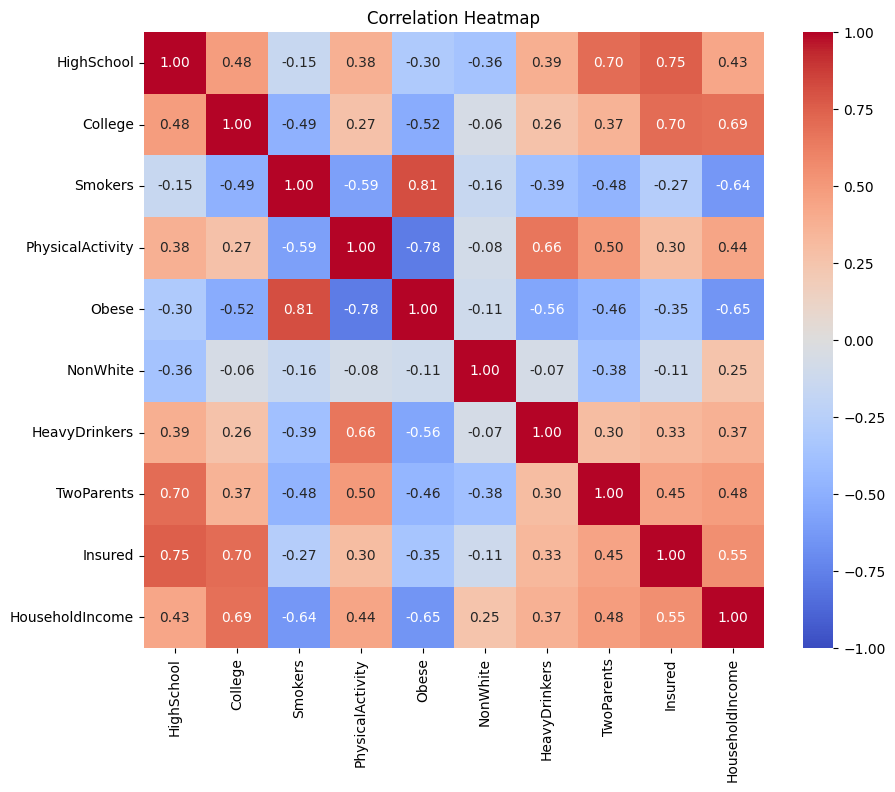

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = df[non_demographic_vars + [response_var]].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


## Q 5. Fit a simple linear regression model to predict Y using the COLLEGE explanatory variable.  Use the base STAT lm(Y~X) function.  Why would you want to start with this explanatory variable?   Call this Model 1.   Report the prediction equation for Model 1 and interpret each coefficient of the model in the context of this problem.  In addition, report and interpret the R-squared statistic for Model 1.

In [14]:
import statsmodels.api as sm

# Fit simple linear regression model (Model 1)
X = sm.add_constant(df['College'])  # Adding constant term
Y = df['HouseholdIncome']
model_1 = sm.OLS(Y, X).fit()

# Get coefficients and R-squared statistic
intercept = model_1.params[0]
slope = model_1.params[1]
r_squared = model_1.rsquared

# Report prediction equation and interpretation
print("Prediction equation for Model 1:")
print(f"Y = {intercept:.2f} + {slope:.2f} * COLLEGE")
print("\nInterpretation of coefficients:")
print(f"The intercept ({intercept:.2f}) represents the expected household income when the percentage of the population with a college degree is 0%.")
print(f"The slope ({slope:.2f}) represents the change in expected household income for a one-unit increase in the percentage of the population with a college degree.")

# Report and interpret R-squared statistic
print("\nR-squared statistic for Model 1:")
print(f"R-squared: {r_squared:.2f}")
print("Interpretation: Approximately {r_squared:.2f}% of the variability in household income can be explained by the percentage of the population with a college degree.")


Prediction equation for Model 1:
Y = 23.07 + 0.98 * COLLEGE

Interpretation of coefficients:
The intercept (23.07) represents the expected household income when the percentage of the population with a college degree is 0%.
The slope (0.98) represents the change in expected household income for a one-unit increase in the percentage of the population with a college degree.

R-squared statistic for Model 1:
R-squared: 0.47
Interpretation: Approximately {r_squared:.2f}% of the variability in household income can be explained by the percentage of the population with a college degree.


Summary in tabular Format

In [15]:
import statsmodels.api as sm

# Fit simple linear regression model (Model 1)
X = df['College']  # Explanatory variable
y = df['HouseholdIncome']  # Response variable

X = sm.add_constant(X)  # Add constant term for intercept
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        HouseholdIncome   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     42.57
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           3.94e-08
Time:                        04:51:34   Log-Likelihood:                -162.68
No. Observations:                  50   AIC:                             329.4
Df Residuals:                      48   BIC:                             333.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.0664      4.719      4.888      0.0

Plot slope

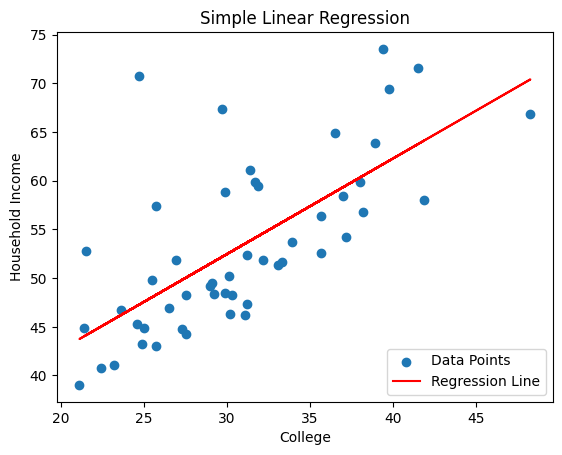

In [16]:
import matplotlib.pyplot as plt

# Scatter plot of the data points
plt.scatter(df['College'], df['HouseholdIncome'], label='Data Points')

# Plot the regression line
plt.plot(df['College'], model.predict(X), color='red', label='Regression Line')

# Set labels and title
plt.xlabel('College')
plt.ylabel('Household Income')
plt.title('Simple Linear Regression')

# Add legend
plt.legend()

# Show plot
plt.show()


## Q 6. From your Model 1 results for task 5) – Specify the null and alternative hypothesis separately for each of the two parameters in the model.  Report and interpret the results of the T-tests for these hypotheses.  In addition, state the null and alternative hypotheses for the omnibus (i.e. overall) model.   Report the ANOVA table and interpret the results of the F-test.  

In [17]:
# Fit the simple linear regression model
model = sm.OLS(df['HouseholdIncome'], sm.add_constant(df['College'])).fit()

# Print the summary of the model
print(model.summary())

# Significance level
alpha = 0.05

# Results of T-tests
print("\nResults of T-tests:")
# Test for intercept
t_stat_intercept = model.t_test([1, 0])
p_value_intercept = t_stat_intercept.pvalue
if p_value_intercept < alpha:
    print("Reject the null hypothesis for intercept")
else:
    print("Failed to reject the null hypothesis for intercept")

# Test for slope
t_stat_slope = model.t_test([0, 1])
p_value_slope = t_stat_slope.pvalue
if p_value_slope < alpha:
    print("Reject the null hypothesis for slope")
else:
    print("Failed to reject the null hypothesis for slope")


# Omnibus test
print("\nResults of Omnibus test:")
F_statistic = model.fvalue
p_value_omnibus = model.f_pvalue
if p_value_omnibus < alpha:
    print("Reject the null hypothesis for the overall model")
else:
    print("Failed to reject the null hypothesis for the overall model")

                            OLS Regression Results                            
Dep. Variable:        HouseholdIncome   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     42.57
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           3.94e-08
Time:                        04:51:34   Log-Likelihood:                -162.68
No. Observations:                  50   AIC:                             329.4
Df Residuals:                      48   BIC:                             333.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.0664      4.719      4.888      0.0

Manual T test to verify the values


1.   standard error
2.   T value


i) find standard error-

In [20]:
# Create a variable of predicted values (Y_hat)
predicted_values = model.predict(sm.add_constant(df['College']))

residuals = df['HouseholdIncome'] - predicted_values
sum_squared_residuals = (residuals ** 2).sum()


print("Sum of squared residuals(SSE):", sum_squared_residuals)

MSE = sum_squared_residuals / 48
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE: ", RMSE)


mean= df['College'].mean()
s= (df['College']-mean)**2
a= s.sum()
b= np.sqrt(a)

sb1 = RMSE/b

print("Sb1 :", sb1)


Sum of squared residuals(SSE): 1961.1295116900064
MSE : 40.85686482687513
RMSE:  6.391937486151998
Sb1 : 0.1502200344262265


In [21]:
mean= df['College'].mean()
a = (df['College']-mean)

mean= df['HouseholdIncome'].mean()
b = (df['HouseholdIncome']-mean)

sum = (a* b).sum()

sq= (a**2).sum()

b1= sum/sq
print(b1)


t= b1  / sb1
print("T statistics :", t)

0.9801440892107072
T statistics : 6.524722837099727


In [22]:
from scipy.stats import t

# Degrees of freedom
df_residual = model.df_resid  # Degrees of freedom for residuals
df_intercept = 1  # Degrees of freedom for intercept (1 because it's a single parameter)
df_slope = 1  # Degrees of freedom for slope (1 because it's a single parameter)

# Calculate the critical t-value for a two-tailed test (assuming alpha = 0.05)
t_critical = t.ppf(1 - alpha/2, df_residual)

# Print the critical t-value
print("Critical t-value:", t_critical)


Critical t-value: 2.0106347546964454


**" " " Hence, We reject the null hypothesis " " "**

Manual verification with the help of P value:---

In [23]:
# Fit the simple linear regression model
model = sm.OLS(df['HouseholdIncome'], sm.add_constant(df['College'])).fit()

# Extract p-values for intercept and slope
p_value_intercept = model.pvalues[0]
p_value_slope = model.pvalues[1]

# Print p-values
print("\nP-value for intercept:", p_value_intercept)
print("P-value for slope:", p_value_slope)



P-value for intercept: 1.1779951527024106e-05
P-value for slope: 3.9410540076837224e-08


Standard error of B0:---

In [24]:

# Extract mean of the independent variable
mean_x = df['College'].mean()

# Calculate the number of observations
n = len(df)

# Calculate the sum of squares of deviations of independent variable from its mean
sum_squares_x = np.sum((df['College'] - mean_x) ** 2)

# Calculate the standard error of the intercept
se_intercept = RMSE * np.sqrt( ((1/n) + (mean_x ** 2 / sum_squares_x)))

print("Standard Error of Intercept (SE_b0):", se_intercept)


Standard Error of Intercept (SE_b0): 4.7186783794324025


## Q 7. For Model 1, write R-code to create a variable of predicted values based on your Model 1 prediction equation from task 5.  Use the predicted values and the original response variable Y to create a variable of residuals (i.e. residual = Y – Y_hat = observed minus predicted) for Model 1.   Using the original Y variable, the predicted, and/or residual variables, write python code:----

### Square each of the residuals and then add them up.  This is called sum of squared residuals, or sums of squared errors.

In [25]:
# Create a variable of predicted values (Y_hat)
predicted_values = model.predict(sm.add_constant(df['College']))

# Create a variable of residuals
residuals = df['HouseholdIncome'] - predicted_values

# Square each of the residuals and then add them up
sum_squared_residuals = (residuals ** 2).sum()


print("Sum of squared residuals (sums of squared errors):", sum_squared_residuals)



# Fit the simple linear regression model
model = sm.OLS(df['HouseholdIncome'], sm.add_constant(df['College'])).fit()

# Add a column for predicted values (Y_hat)
df['Predicted'] = predicted_values

# Add a column for residuals (observed - predicted)
df['Residual'] = residuals

# Generate a column of squared residuals
df['SquaredResidual'] = sum_squared_residuals

# Print the DataFrame with observed, predicted, and residual values
print(df)



Sum of squared residuals (sums of squared errors): 1961.1295116900064
             State Region  Population  HouseholdIncome  HighSchool  College  \
0          Alabama      S       4.849           43.253        84.9     24.9   
1           Alaska      W       0.737           70.760        92.8     24.7   
2          Arizona      W       6.731           49.774        85.6     25.5   
3         Arkansas      S       2.966           40.768        87.1     22.4   
4       California      W      38.803           61.094        84.1     31.4   
5         Colorado      W       5.356           58.433        89.5     37.0   
6      Connecticut     NE       3.597           69.461        91.0     39.8   
7         Delaware     NE       0.936           59.878        86.9     31.7   
8          Florida      S      19.893           46.956        87.1     26.5   
9          Georgia      S      10.097           49.179        85.3     29.0   
10          Hawaii      W       1.420           67.402       

### Deviate the mean of the Y’s from the value of Y for each record (i.e. Y – Y_bar).  Square each of the deviations and then add them up.  This is called sum of squares total.

In [26]:
# Calculate the mean of the response variable Y
mean_Y = df['HouseholdIncome'].mean()

# Calculate the deviations of each Y value from the mean
deviations = df['HouseholdIncome'] - mean_Y

# Square each deviation
squared_deviations = deviations ** 2

# Sum up all the squared deviations
sum_squared_total = squared_deviations.sum()

print("Sum of squares total:", sum_squared_total)


Sum of squares total: 3700.4882920799996


### Deviate the mean of the Y’s from the value of predicted (Y_hat) for each record (i.e. Y_hat – Y_bar).  Square each of these deviations and then add them up.  This is called the sum of squares due to regression.

In [27]:
# Calculate the mean of the predicted values (Y_hat)
mean_Y_hat = df['Predicted'].mean()

# Calculate the deviations of each predicted value from the mean
deviations_regression = df['Predicted'] - mean_Y_hat

# Square each deviation
squared_deviations_regression = deviations_regression ** 2

# Sum up all the squared deviations
sum_squared_regression = squared_deviations_regression.sum()

print("Sum of squares due to regression:", sum_squared_regression)


Sum of squares due to regression: 1739.3587803899948


### Calculate a statistic that is:   (Sum of Squares due to Regression) / (Sum of squares Total)

In [28]:
# Calculate the coefficient of determination (R^2)
R_squared = sum_squared_regression / sum_squared_total

print("Coefficient of determination (R^2):", R_squared)


Coefficient of determination (R^2): 0.4700349367710936


Verify and note the accuracy of the ANOVA table and R-squared values from the regression printout from part 4), relative to your computations here.  Report your code for these computations.

In [29]:
# Calculate the total sum of squares (SST)
SST = sum_squared_total

# Calculate the sum of squares explained by regression (SSR)
SSR = sum_squared_regression

# Calculate the sum of squares of residuals (SSE)
SSE = sum_squared_residuals

# Calculate the degrees of freedom
n = len(df)  # Number of observations
k = 1  # Number of predictors (in simple linear regression)
df_regression = k
df_residual = n - k - 1
df_total = n - 1

# Calculate the mean square for regression (MSR)
MSR = SSR / df_regression

# Calculate the mean square for residuals (MSE)
MSE = SSE / df_residual

# Calculate the F-statistic
F_statistic = MSR / MSE

# Calculate the coefficient of determination (R-squared)
R_squared_manual = SSR / SST

# Print the ANOVA table and R-squared values
print("ANOVA Table:")
print("======================================================================")
print("Source       |  Sum of Squares |  DF  |  Mean Square  |  F-statistic")
print("=======================================================================")
print("Regression   |  {:<15.2f}|  {:<3d} |  {:<13.2f}|  {:<12.2f}".format(SSR, df_regression, MSR, F_statistic))
print("Residual     |  {:<15.2f}|  {:<3d} |  {:<13.2f}|".format(SSE, df_residual, MSE))
print("Total        |  {:<15.2f}|  {:<3d} |".format(SST, df_total))
print("=======================================================================")

print("\nR-squared (Computed manually):", R_squared_manual)


ANOVA Table:
Source       |  Sum of Squares |  DF  |  Mean Square  |  F-statistic
Regression   |  1739.36        |  1   |  1739.36      |  42.57       
Residual     |  1961.13        |  48  |  40.86        |
Total        |  3700.49        |  49  |

R-squared (Computed manually): 0.4700349367710936


## Q 8. From task 7 you created a variable of residuals for Model 1.  Write code to standardize the residuals. Plot the standardized residuals using a histogram.  Also, plot the standardized residuals in a scatterplot with the predicted values.  Discuss what you see in these two graphs.

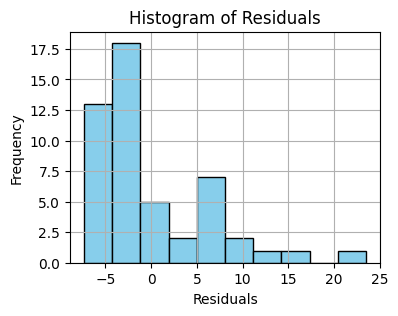

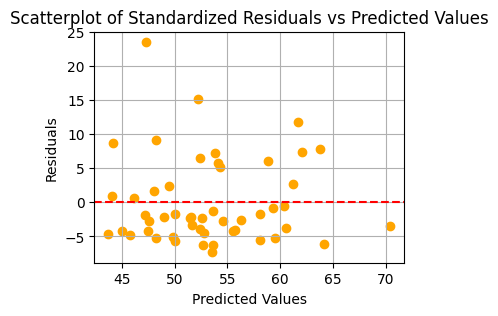

In [30]:
# Plot histogram of standardized residuals
plt.figure(figsize=(4, 3))
plt.hist(residuals, bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot scatterplot of standardized residuals vs predicted values
plt.figure(figsize=(4,3 ))
plt.scatter(predicted_values, residuals, color='orange')
plt.title('Scatterplot of Standardized Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')  # Add horizontal line at y=0
plt.grid(True)
plt.show()


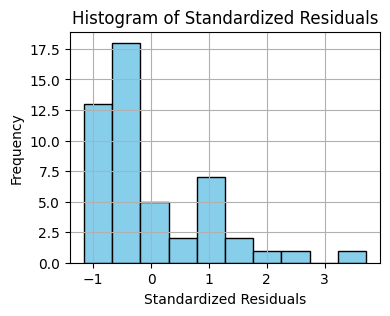

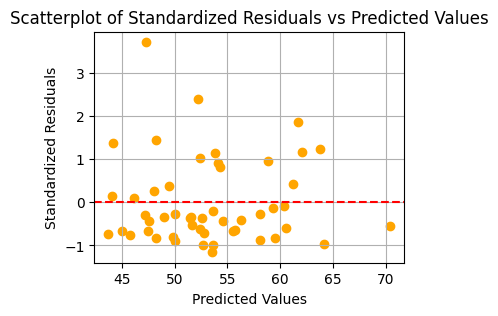

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the standard deviation of residuals
std_residuals = residuals.std()

# Standardize the residuals
standardized_residuals = residuals / std_residuals

# Plot histogram of standardized residuals
plt.figure(figsize=(4,3))
plt.hist(standardized_residuals, bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Standardized Residuals')
plt.xlabel('Standardized Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot scatterplot of standardized residuals vs predicted values
plt.figure(figsize=(4,3))
plt.scatter(predicted_values, standardized_residuals, color='orange')
plt.title('Scatterplot of Standardized Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Residuals')
plt.axhline(y=0, color='r', linestyle='--')  # Add horizontal line at y=0
plt.grid(True)
plt.show()


Z score 0    -0.666894
1     3.712077
2     0.270911
3    -0.672370
4     1.146160
5    -0.142067
6     1.167307
7     0.907470
8    -0.329455
9    -0.365393
10    2.406635
11    0.089966
12   -0.586582
13   -0.280160
14   -0.440075
15   -0.660284
16   -0.825139
17   -0.426159
18   -0.619588
19    1.873724
20   -0.559783
21   -0.517776
22   -0.075227
23   -0.745526
24   -0.990604
25   -1.156889
26   -0.637527
27    1.368945
28    0.960155
29    1.246619
30    0.139966
31   -0.969192
32   -1.001014
33   -0.403441
34   -0.704480
35   -0.290685
36   -0.369844
37   -0.870890
38   -0.268176
39   -0.797513
40   -0.330937
41   -0.904530
42    0.390063
43    1.019265
44   -0.831566
45    0.428833
46    0.813256
47   -0.752845
48   -0.195046
49    1.446303
dtype: float64


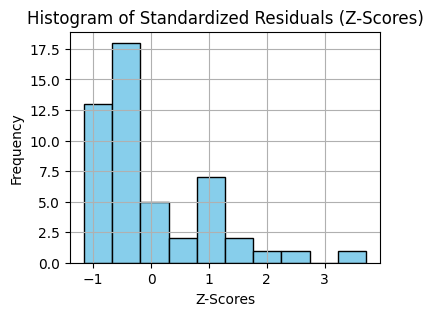

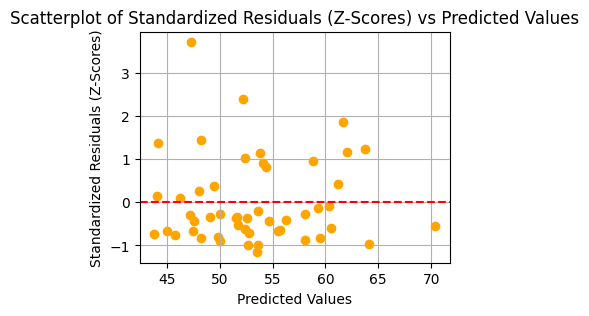

In [32]:
# Calculate the mean of residuals
mean_residuals = residuals.mean()

# Calculate the standard deviation of residuals
std_residuals = residuals.std()

# Calculate z-scores for residuals
z_scores = (residuals - mean_residuals) / std_residuals

print("Z score", z_scores)

# Plot histogram of z-scores (standardized residuals)
plt.figure(figsize=(4, 3))
plt.hist(z_scores, bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Standardized Residuals (Z-Scores)')
plt.xlabel('Z-Scores')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot scatterplot of z-scores (standardized residuals) vs predicted values
plt.figure(figsize=(4, 3))
plt.scatter(predicted_values, z_scores, color='orange')
plt.title('Scatterplot of Standardized Residuals (Z-Scores) vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Residuals (Z-Scores)')
plt.axhline(y=0, color='r', linestyle='--')  # Add horizontal line at y=0
plt.grid(True)
plt.show()

